In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [0]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
trainData = trainData.reshape(3500,784)
validData = validData.reshape(100,784)
testData = testData.reshape(145,784)

In [0]:
def crossEntropyLoss(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    z = np.dot(x,W_b)
    sigmoid = 1/(1 + np.exp(-z))
    CELoss = np.linalg.norm(np.dot(-y, np.log(sigmoid)) - np.dot(1 - y, np.log(1-sigmoid)))/len(x) + (reg/2)*np.linalg.norm(W)**2
    return CELoss

In [0]:
def gradCE(W, b, x, y, reg):
    # Your implementation here
    x = np.insert(x, 0, 1, axis=1)
    W_b = np.insert(W, 0, b)
    y = y.reshape(y.shape[0])
    z = np.dot(x,W_b)
    sigmoid = 1 / (1 + np.exp(-z))
    error = sigmoid - y
    dL_dwb = np.dot(np.transpose(x),error)/len(x) 
    return dL_dwb[1:], dL_dwb[0]

In [0]:
def accuracy(W, b, x, y):
   x = np.insert(x, 0, 1, axis=1)
   W_b = np.insert(W, 0, b)
   y = y.reshape(y.shape[0])
   pred = np.dot(x,W_b)
   pred = np.where(pred >= 0.5, 1, 0)
   accuracy = np.sum(pred == y)/len(pred)
   return accuracy

In [0]:
def grad_descent(W, b, x, y, v_x, v_y, test_x, test_y, alpha, epochs, reg, error_tol, lossType = 'MSE'):
    # Your implementation here
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    test_loss = []
    test_accuracy = []
    for i in range(epochs):
        if lossType == 'MSE':
            dl_dw, dl_db = gradMSE(W, b, x, y, reg) # The gradient based on loss for each image
        elif lossType == 'CE':
            dl_dw, dl_db = gradCE(W, b, x, y, reg) # The gradient based on loss for each image
        W_new = W - alpha*(dl_dw) # Updates weights
        b -= alpha*(dl_db) # Updates bias
        
        if (np.linalg.norm(W_new - W) < error_tol):
            return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]
        
        W = W_new
        # Training Loss:
        t_accuracy = accuracy(W,b,x,y)
        if lossType == 'MSE':
            t_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            t_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Training Loss: %0.2f, Training Accuracy: %0.2f" % (i, t_loss, t_accuracy))
        training_loss += [t_loss]
        training_accuracy += [t_accuracy]

        # Validation Loss:
        v_accuracy = accuracy(W,b,v_x,v_y)
        if lossType == 'MSE':
            v_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            v_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Validation Loss: %0.2f, Validation Accuracy: %0.2f" % (i, v_loss, v_accuracy))
        validation_loss += [v_loss]
        validation_accuracy += [v_accuracy]

        # Testing Loss:
        test_acc = accuracy(W,b,test_x,test_y)
        if lossType == 'MSE':
            te_loss = MSE(W, b, x, y, reg)
        elif lossType == 'CE':
            te_loss = crossEntropyLoss(W, b, x, y, reg)
        print("Epoch: %d, Testing Loss: %0.2f, Testing Accuracy: %0.2f" % (i, te_loss, test_acc))
        test_loss += [te_loss]
        test_accuracy += [test_acc]
      
    return [W, b, training_loss, validation_loss, test_loss, training_accuracy, validation_accuracy, test_accuracy]

In [0]:
# Initialize Parameters and Hyperparameters:
W_i = np.random.normal(0.5,0.5,28*28)
b_i = 0
l_r = [0.005]
#l_r = [0.005, 0.001, 0.0001]
#reg = [0.001, 0.1, 0.5]
epochs = 700
reg = 0
error_tol = 10**-7

In [0]:
weight = np.empty([len(l_r), 28*28])
bias = np.empty([len(l_r), 1])
training_error = np.empty([len(l_r), epochs])
training_accuracy = np.empty([len(l_r), epochs])
validation_error = np.empty([len(l_r), epochs])
validation_accuracy = np.empty([len(l_r), epochs])
testing_error = np.empty([len(l_r), epochs])
testing_accuracy = np.empty([len(l_r), epochs])

In [0]:
W = W_i
b = b_i
r = 0
[weight[r], bias[r], training_error[r], validation_error[r], testing_error[r], training_accuracy[r], validation_accuracy[r], testing_accuracy[r]] = grad_descent(W, b, trainData, trainTarget, validData, validTarget, testData, testTarget, 0.005, epochs, reg, error_tol,lossType = 'CE')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Epoch: 0, Training Loss: nan, Training Accuracy: 0.50
Epoch: 0, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 0, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 1, Training Loss: nan, Training Accuracy: 0.50
Epoch: 1, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 1, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 2, Training Loss: nan, Training Accuracy: 0.50
Epoch: 2, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 2, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 3, Training Loss: nan, Training Accuracy: 0.50
Epoch: 3, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 3, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 4, Training Loss: nan, Training Accuracy: 0.50
Epoch: 4, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 4, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 5, Training Loss: nan, Training Accuracy: 0.50
Epoch: 5, Validation Loss: nan, Validation Accuracy: 0.51
Epoch: 5, Testing Loss: nan, Testing Accuracy: 0.45
Epoch: 6, Traini

KeyboardInterrupt: ignored

In [0]:
def plotting_loss(epoch, training_error, validation_error, testing_error, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_error)
    plt.plot(epoch_idx,validation_error)
    plt.plot(epoch_idx,testing_error)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Loss', 'Validation Loss', 'Testing Loss'])
    plt.title(title)
    plt.show()

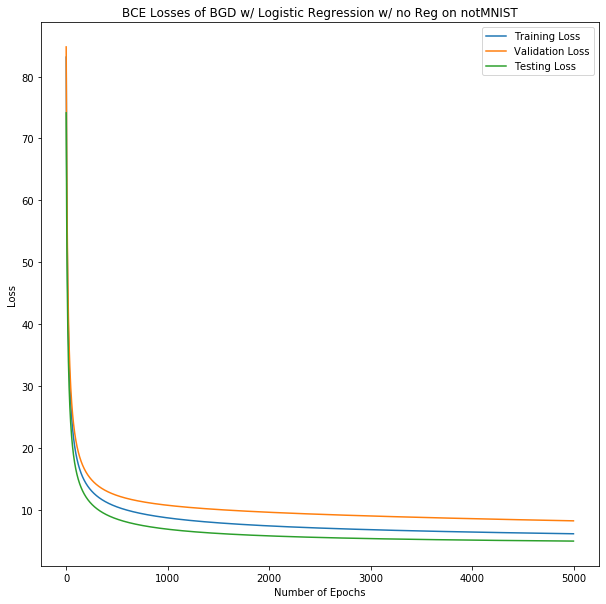

In [0]:
plotting_loss(epochs, training_error[0], validation_error[0], testing_error[0],"BCE Losses of BGD w/ Logistic Regression w/ no Reg on notMNIST")

In [0]:
def plotting_accuracy(epoch, training_accuracy, validation_accuracy, testing_accuracy, title):
    epoch_idx = np.arange(0, epoch)
    plt.figure(figsize=(10,10))
    plt.plot(epoch_idx,training_accuracy)
    plt.plot(epoch_idx,validation_accuracy)
    plt.plot(epoch_idx,testing_accuracy)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy'])
    plt.title(title)
    plt.show()

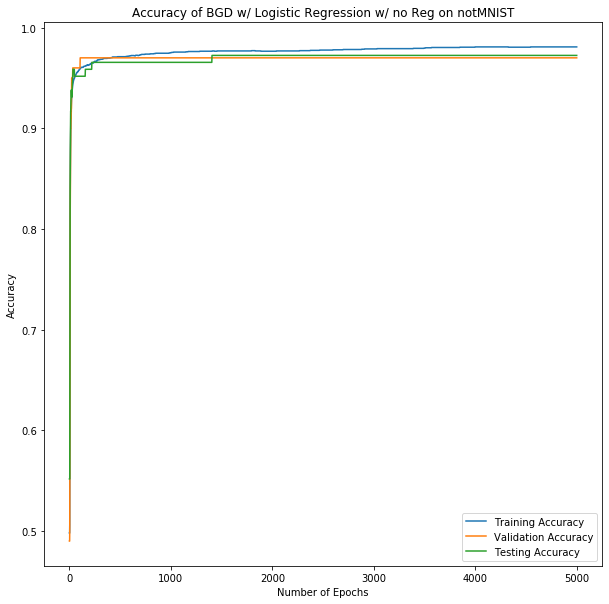

In [0]:
plotting_accuracy(epochs, training_accuracy[0], validation_accuracy[0], testing_accuracy[0], "Accuracy of BGD w/ Logistic Regression w/ no Reg on notMNIST")